In [1]:
import os,sys
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
df=pd.read_csv('data/dummy_data.csv')

In [4]:
df

,proj_no,start_date,end_date,location,service,days_taken,price,team
0,1,2018-01-06,2018-02-01,AUS,Digital Transformation Service,26,786000,Team A
1,2,2018-01-11,2018-03-13,IND,Growth Driven Web Design and Development,61,560000,Team B
2,3,2018-01-16,2018-02-08,CAN,Digital Transformation Service,23,623000,Team E
3,4,2018-01-22,2018-01-31,IND,Digital Strategy and Consultation,9,401000,Team A
4,5,2018-01-26,2018-02-05,CAN,Digital Strategy and Consultation,10,496000,Team C
...,...,...,...,...,...,...,...,...
406,407,2021-12-20,2022-01-06,CAN,Digital Transformation Service,17,252000,Team E
407,408,2021-12-22,2022-01-01,IND,Digital Strategy and Consultation,10,479000,Team E
408,409,2021-12-24,2022-01-27,CAN,Growth Driven Web Design and Development,34,354000,Team B
409,410,2021-12-27,2022-02-26,CAN,App Development,61,911000,Team C


In [5]:
df['year']=df['start_date'].apply(lambda x: int(x.split('-')[0]))

In [6]:
df['year'].value_counts().sort_index()

2018     70
2019    122
2020     67
2021    152
Name: year, dtype: int64

In [7]:
df['service'].value_counts()

Digital Transformation Service              155
Growth Driven Web Design and Development    108
Digital Strategy and Consultation            97
App Development                              51
Name: service, dtype: int64

In [8]:
df[['year','service']].groupby(['year','service']).size().reset_index(name='counts')

,year,service,counts
0,2018,App Development,8
1,2018,Digital Strategy and Consultation,11
2,2018,Digital Transformation Service,24
3,2018,Growth Driven Web Design and Development,27
4,2019,App Development,10
5,2019,Digital Strategy and Consultation,22
6,2019,Digital Transformation Service,52
7,2019,Growth Driven Web Design and Development,38
8,2020,App Development,4
9,2020,Digital Strategy and Consultation,23


In [9]:
df[['year','price']].groupby('year').mean()

,price
year,
2018,556542.857143
2019,558524.590164
2020,485388.059701
2021,524480.263158


Text(0, 0.5, 'Avg price of service offered')

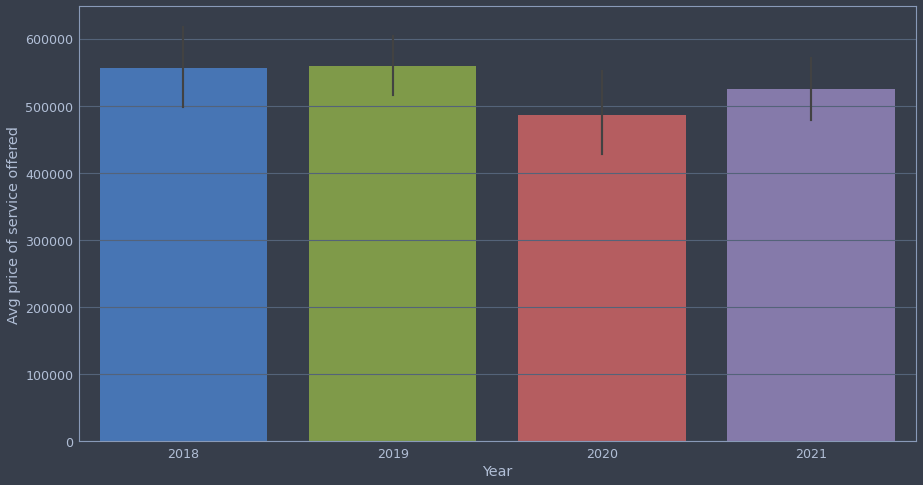

In [11]:
f=plt.figure(figsize=(15,8))
sns.barplot(data=df,x='year',y='price')
plt.xlabel('Year')
plt.ylabel('Avg price of service offered')

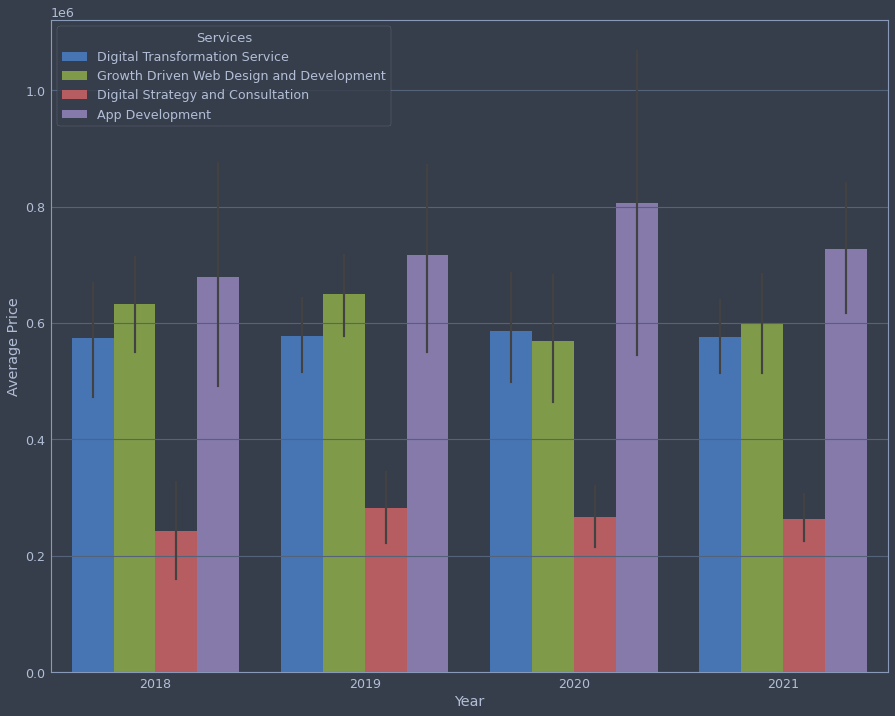

In [12]:
f=plt.figure(figsize=(15,12))
sns.barplot(data=df,x='year',y='price', hue='service')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Services')

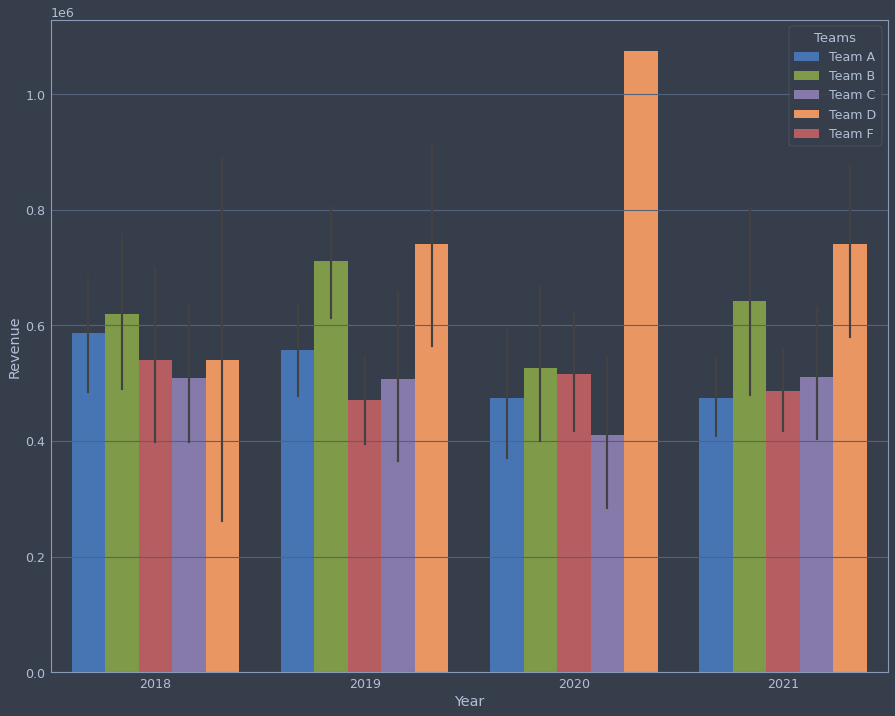

In [12]:
f=plt.figure(figsize=(15,12))
sns.barplot(data=df,x='year',y='price', hue='team')
handles, labels = plt.gca().get_legend_handles_labels()
legend_dict=dict(zip(labels,handles))
labels= sorted(labels)
handles=[legend_dict[label] for label in labels]
plt.xlabel('Year')
plt.ylabel('Avg price of a project')
plt.legend(handles,labels,title='Teams');

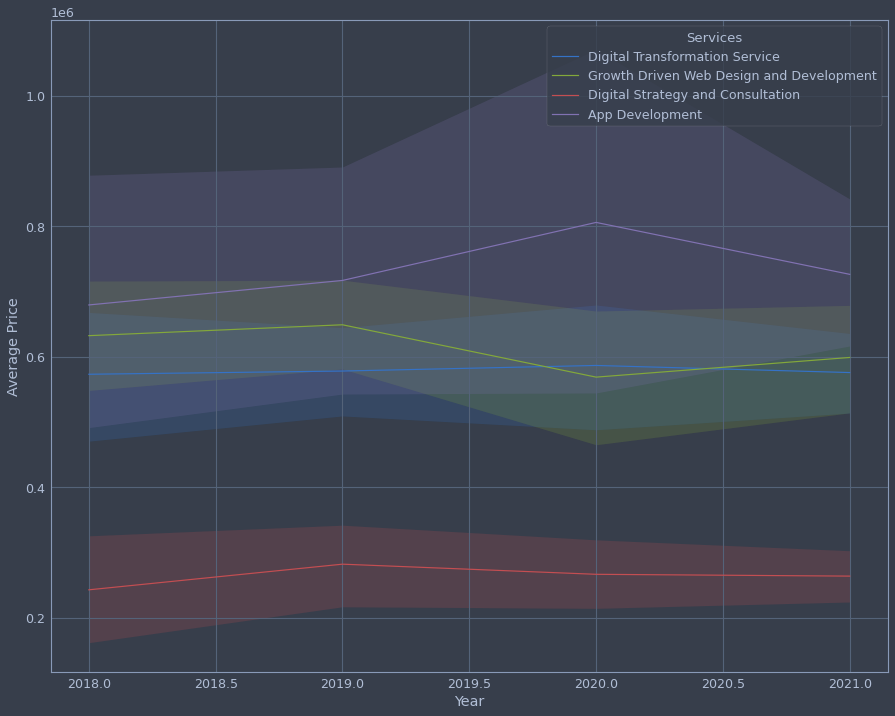

In [13]:
f=plt.figure(figsize=(15,12))
sns.lineplot(data=df,x='year',y='price', hue='service')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Services')

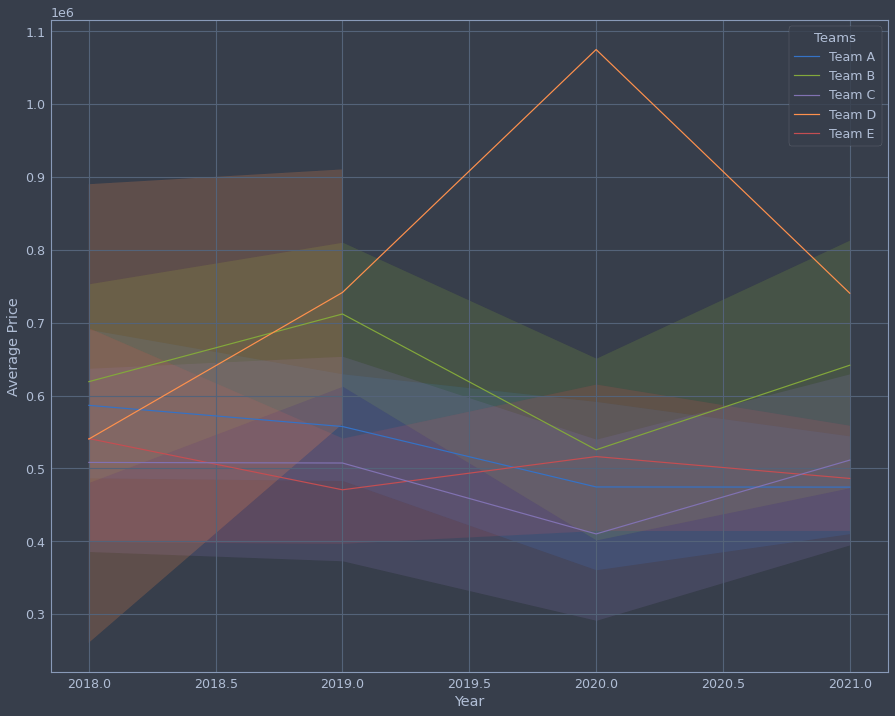

In [14]:
f=plt.figure(figsize=(15,12))
sns.lineplot(data=df,x='year',y='price', hue='team')
handles, labels = plt.gca().get_legend_handles_labels()
legend_dict=dict(zip(labels,handles))
labels= sorted(labels)
handles=[legend_dict[label] for label in labels]
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(handles,labels,title='Teams');

Text(0, 0.5, 'No. of Projects')

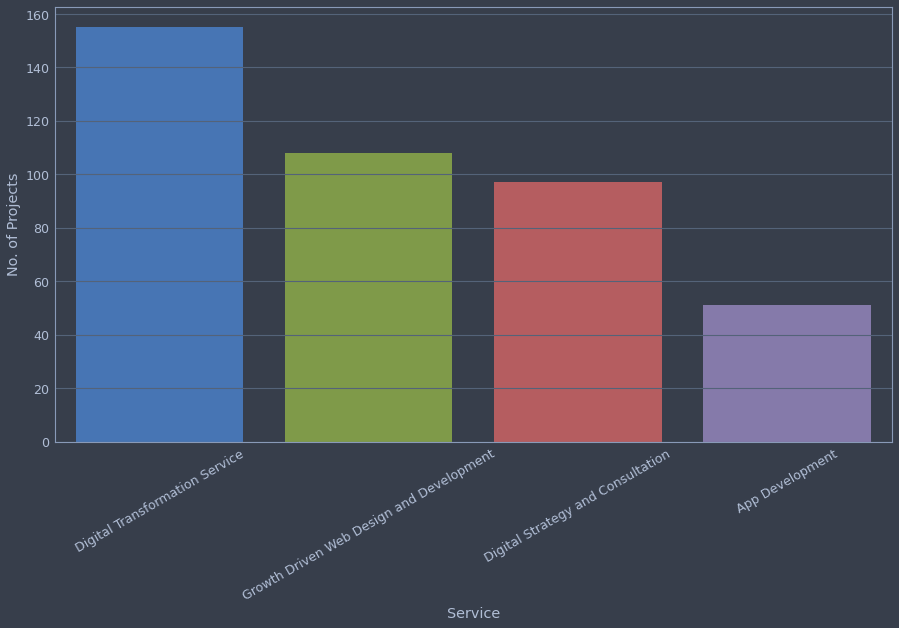

In [15]:
f=plt.figure(figsize=(15,8))
sns.countplot(data=df,x='service')
plt.xticks(rotation=30);
plt.xlabel('Service')
plt.ylabel('No. of Projects')

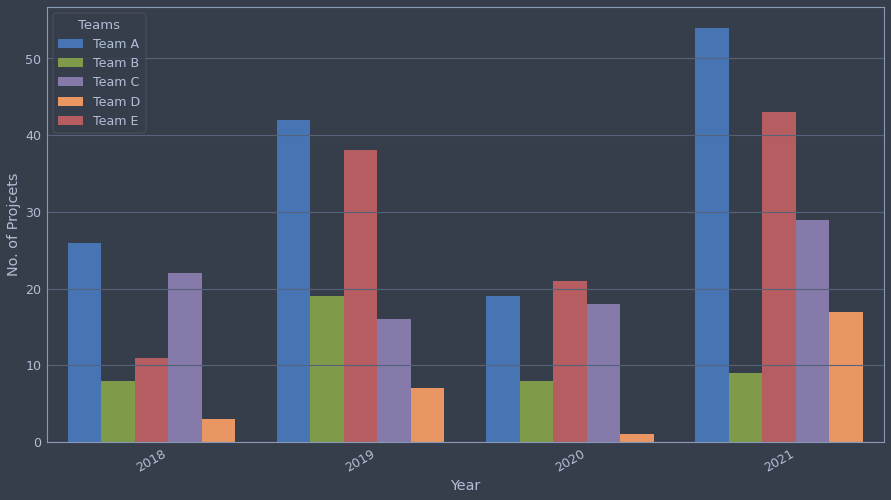

In [16]:
f=plt.figure(figsize=(15,8))
sns.countplot(data=df,x='year',hue='team')
plt.xticks(rotation=30);
handles, labels = plt.gca().get_legend_handles_labels()
legend_dict=dict(zip(labels,handles))
labels= sorted(labels)
handles=[legend_dict[label] for label in labels]
plt.xlabel('Year')
plt.ylabel('No. of Projcets')
plt.legend(handles,labels,title='Teams');

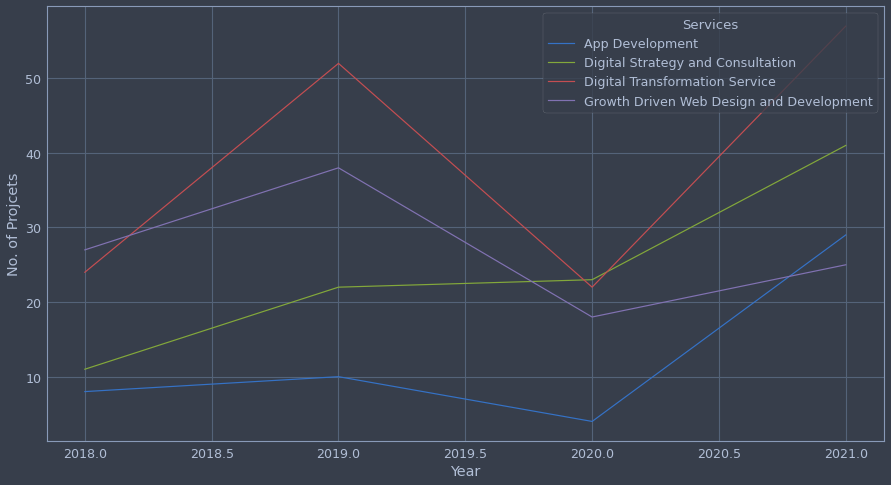

In [17]:
f=plt.figure(figsize=(15,8))
sns.lineplot(data=df[['year','service']].groupby(['year','service']).size().reset_index(name='counts'),x='year',y='counts',hue='service')
plt.xlabel('Year')
plt.ylabel('No. of Projcets')
plt.legend(title='Services');

In [18]:
df.groupby(['year','service','team']).size().reset_index(name='counts')

,year,service,team,counts
0,2018,App Development,Team C,5
1,2018,App Development,Team D,3
2,2018,Digital Strategy and Consultation,Team A,3
3,2018,Digital Strategy and Consultation,Team C,7
4,2018,Digital Strategy and Consultation,Team E,1
5,2018,Digital Transformation Service,Team A,14
6,2018,Digital Transformation Service,Team E,10
7,2018,Growth Driven Web Design and Development,Team A,9
8,2018,Growth Driven Web Design and Development,Team B,8
9,2018,Growth Driven Web Design and Development,Team C,10


In [20]:
pd.DataFrame(df.groupby(['year','location','service'])['proj_no'].count())

proj_no
year location service                                          
2018 AUS      App Development                                 1
              Digital Strategy and Consultation               1
              Digital Transformation Service                  2
              Growth Driven Web Design and Development        1
     CAN      App Development                                 2
              Digital Strategy and Consultation               2
              Digital Transformation Service                  4
              Growth Driven Web Design and Development        9
     IND      App Development                                 5
              Digital Strategy and Consultation               8
              Digital Transformation Service                 18
              Growth Driven Web Design and Development       17
2019 AUS      App Development                                 2
              Digital Transformation Service                  3
              Growth Driven Web Design and Development        4
     CAN      App Development                                 3
              Digital Strategy and Consultation               9
              Digital Transformation Service                 17
              Growth Driven Web Design and Development        8
     IND      App Development                                 5
              Digital Strategy and Consultation              13
              Digital Transformation Service                 32
              Growth Driven Web Design and Development       26
2020 CAN      App Development                                 1
              Digital Strategy and Consultation               7
              Digital Transformation Service                 12
              Growth Driven Web Design and Development        7
     IND      App Development                                 3
              Digital Strategy and Consultation              16
              Digital Transformation Service                 10
              Growth Driven Web Design and Development       11
2021 AUS      App Development                                 1
              Digital Transformation Service                  1
     CAN      App Development                                 9
              Digital Strategy and Consultation              20
              Digital Transformation Service                 20
              Growth Driven Web Design and Development       10
     IND      App Development                                19
              Digital Strategy and Consultation              21
              Digital Transformation Service                 36
              Growth Driven Web Design and Development       15

In [21]:
pd.DataFrame(df.groupby(['location','service'])['proj_no'].count())

proj_no
location service                                          
AUS      App Development                                 4
         Digital Strategy and Consultation               1
         Digital Transformation Service                  6
         Growth Driven Web Design and Development        5
CAN      App Development                                15
         Digital Strategy and Consultation              38
         Digital Transformation Service                 53
         Growth Driven Web Design and Development       34
IND      App Development                                32
         Digital Strategy and Consultation              58
         Digital Transformation Service                 96
         Growth Driven Web Design and Development       69

In [22]:
pd.DataFrame(df.groupby(['year','service'])['proj_no'].count())

proj_no
year service                                          
2018 App Development                                 8
     Digital Strategy and Consultation              11
     Digital Transformation Service                 24
     Growth Driven Web Design and Development       27
2019 App Development                                10
     Digital Strategy and Consultation              22
     Digital Transformation Service                 52
     Growth Driven Web Design and Development       38
2020 App Development                                 4
     Digital Strategy and Consultation              23
     Digital Transformation Service                 22
     Growth Driven Web Design and Development       18
2021 App Development                                29
     Digital Strategy and Consultation              41
     Digital Transformation Service                 57
     Growth Driven Web Design and Development       25